# Installing background stars

In [123]:
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord, Angle
from matplotlib import pyplot as plt
import pandas as pd
import astropy.units as u
import numpy as np
from matplotlib.patches import Circle

Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source"

In [150]:
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord
import astropy.units as u

# Define the center of the search as Alpha Centauri
alpha_cen = SkyCoord.from_name('Alpha Centauri')

# Set the search radius to 0.5 degrees
radius = 0.5 * u.deg

# Query the Gaia DR3 database for stars within the search radius
query_str = f"SELECT ra, dec, phot_g_mean_flux, source_id FROM gaiaedr3.gaia_source \
             WHERE CONTAINS(POINT('ICRS', ra, dec), CIRCLE('ICRS', {alpha_cen.ra.deg}, {alpha_cen.dec.deg}, {radius.to(u.deg).value})) = 1"
job = Gaia.launch_job_async(query_str)
result = job.get_results()

# Separate the binary pair from the rest of the stars
alpha_cen_A = result[(result['ra'] == alpha_cen.ra.deg) & (result['dec'] == alpha_cen.dec.deg)][0]
alpha_cen_B = result[(result['ra'] == alpha_cen.ra.deg) & (result['dec'] == alpha_cen.dec.deg)][1]
binary_result = [alpha_cen_A, alpha_cen_B]

# Plot the positions of the retrieved stars, color-coded by phot_g_mean_flux
plt.scatter(result['ra'], result['dec'], c=result['phot_g_mean_flux'], s=5, cmap='inferno')
plt.scatter(binary_result['ra'], binary_result['dec'], c='red', s=100, marker='*', label='Alpha Cen Binary')

plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.title('Stars in the Vicinity of Alpha Centauri')
plt.gca().invert_xaxis() # flip the x-axis to match sky coordinates
plt.colorbar(label='phot_g_mean_flux')
plt.legend()
plt.show()


INFO: Query finished. [astroquery.utils.tap.core]


IndexError: index 0 out of range for table with length 0

In [130]:
result.pprint()

        ra                 dec          phot_g_mean_flux 
       deg                 deg            electron / s   
------------------ ------------------- ------------------
219.87852438964114  -60.83266614463654 13701.682146621843
219.88909718173196 -60.826144921881536  1297.548253840399
 219.8696892739986 -60.840882683522565  4831.102241270071
219.86390404029888  -60.83926538254956 1081.0792236794896
219.87550657825707  -60.82896984129254 26894.949925598285
219.88559114467128  -60.83112988941768 1860.9155177577552
219.88784169575962  -60.83086965264639 1060.3312145981401
219.86978427125797 -60.824625705748375  17604.77532551711
219.87762699486237  -60.82838344136344 13029.627300020404
219.88159647424163  -60.82461572082172  2182.101524487238
219.88014128074033  -60.82522724754039 1150.9279212121528
219.87657242022152  -60.82651809710818  4845.821575523888


In [6]:
def HMS2deg(ra='', dec=''):
  RA, DEC, rs, ds = '', '', 1, 1
  if dec:
    D, M, S = [float(i) for i in dec.split()]
    if str(D)[0] == '-':
      ds, D = -1, abs(D)
    deg = D + (M/60) + (S/3600)
    DEC = '{0}'.format(deg*ds)

  if ra:
    H, M, S = [float(i) for i in ra.split()]
    if str(H)[0] == '-':
      rs, H = -1, abs(H)
    deg = (H*15) + (M/4) + (S/240)
    RA = '{0}'.format(deg*rs)

  if ra and dec:
    return (RA, DEC)
  else:
    return RA or DEC

In [14]:
coord_A = np.array(HMS2deg('14 39 36.49400', '-60 50 02.3737')).astype(float)
coord_B = np.array(HMS2deg('14 39 35.06311', '-60 50 15.0992')).astype(float)

print(coord_A, coord_B)

[219.90205833 -60.83399269] [219.89609629 -60.83752756]


In [109]:
Gaia.MAIN_GAIA_TABLE = "gaiadr2.gaia_source"
Gaia.ROW_LIMIT = 1000

ra = 0.5*(coord_A[0] + coord_B[0])
dec = 0.5*(coord_A[1] + coord_B[1])

query_rad = 0.01  # degrees
coord = SkyCoord(ra=ra, dec=dec, unit=(u.degree, u.degree), frame='icrs')

r = Gaia.query_object_async(coordinate=coord, radius=Angle(query_rad, u.deg), columns=['DESIGNATION', 'ra', 'dec', 'phot_g_mean_flux'])

INFO: Query finished. [astroquery.utils.tap.core]


In [117]:
for i in bg_names:
    if i == 'Gaia DR2 5877725214932864640':
        print(True)

In [115]:
bg_ras = r['ra']
bg_decs = r['dec']
bg_flux = r['phot_g_mean_flux']
bg_names = r['DESIGNATION']
r

DESIGNATION,ra,dec,phot_g_mean_flux,dist
,deg,deg,electron / s,
object,float64,float64,float64,float64
Gaia DR2 5877724974403178496,219.90072658267925,-60.8384125787829,3441.1798721220825,0.00277070304489696
Gaia DR2 5877748648286736896,219.90254264624892,-60.83340963965984,1779.7505467210315,0.0028881627613696046
Gaia DR2 5877748648286736640,219.90189298236515,-60.832662266413735,4491.90794515573,0.003383367664447477
Gaia DR2 5877724974403476864,219.90580323857384,-60.83873935409602,1919.9414881167565,0.0044241969939687355
Gaia DR2 5877724974403466240,219.90304380027706,-60.84129499651214,1700.9385455640859,0.005861437754307729
Gaia DR2 5877748442128857984,219.9109453075987,-60.837322022718084,671.5778784849773,0.0059829926284389314
Gaia DR2 5877748648273789312,219.91026168293436,-60.83134114165038,781.946354672079,0.007009540196709955
Gaia DR2 5877748442111772672,219.91385495910828,-60.83309027015375,18589.344038570533,0.007672367600975294


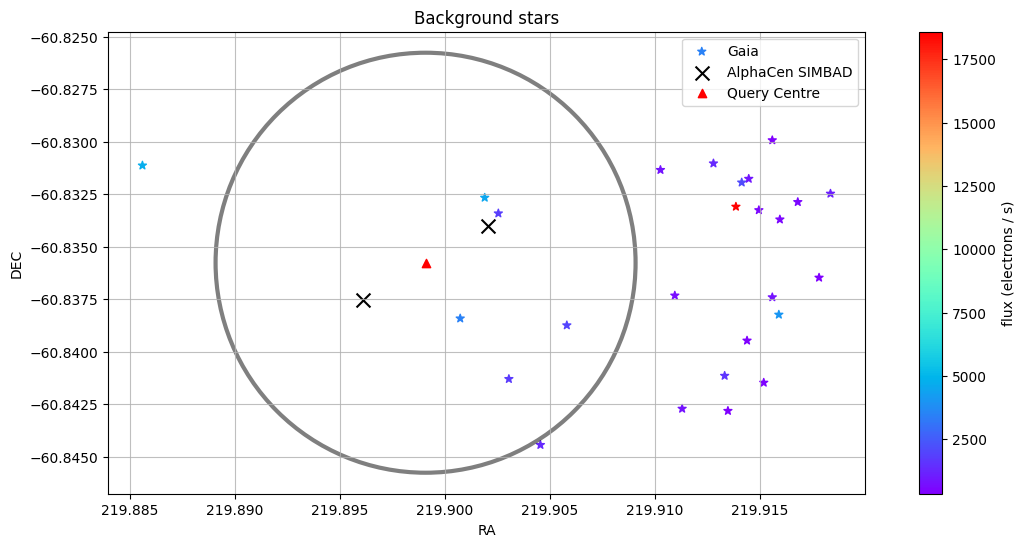

In [112]:
query_region = Circle((ra, dec), radius=query_rad, facecolor='none', edgecolor='k', linewidth=3, alpha=0.5)

fig, ax = plt.subplots(figsize=(14, 6))
c=ax.scatter(bg_ras, bg_decs,
             # s= 10 * (1 + bg_stars['flux']/bg_stars['flux'].max())**10,
             c=bg_flux,
             #alpha=bg_stars['flux']/bg_stars['flux'].max(),
             cmap='rainbow',
             label='Gaia',
             marker='*'
             )

ax.scatter([coord_A[0], coord_B[0]], [coord_A[1], coord_B[1]], c='k', marker='x', s=100, label='AlphaCen SIMBAD')
ax.grid(alpha=.8, zorder=100)
ax.add_patch(query_region)
ax.set(xlabel='RA',
       ylabel='DEC',
       # xlim = (ra - ra_wid/2, ra + ra_wid/2),
       # ylim = (dec - dec_wid/2, dec + dec_wid/2),
       title='Background stars',
       aspect = 'equal',
       )
ax.scatter(ra, dec, label='Query Centre', marker='^', c='r')
ax.legend(loc='upper right')
fig.colorbar(c, label='flux (electrons / s)')
plt.show()

In [93]:
import toliman
toliman._simulate_background_stars()

dLux: Jax is running in 32-bit, to enable 64-bit visit: https://jax.readthedocs.io/en/latest/notebooks/Common_Gotchas_in_JAX.html#double-64bit-precision


FileNotFoundError: [Errno 2] No such file or directory: 'toliman/assets'

In [17]:
df_raw = pd.read_table('data/bsc5.dat')
print(df_raw.head())

     1          BD+44 4550      3 36042          46           000001.1+444022000509.9+451345114.44-16.88 6.70  +0.07 +0.08         A1Vn               -0.012-0.018      -018      195  4.2  21.6AC   3
0     2          BD-01 4525      6128569         ...                                                                                                                                                  
1     3 33    PscBD-06 6357     281285721002I    ...                                                                                                                                                  
2     4 86    PegBD+12 5063     87 917012004     ...                                                                                                                                                  
3     5          BD+57 2865    123 21085         ...                                                                                                                                                  
4    

In [22]:
from astropy.table import Table

# Set the path to the BSC file
bsc_file = "data/bsc5.dat"

# Read the BSC into a table
bsc_table = Table.read(bsc_file, format="ascii.fixed_width")

# Print the first few rows of the table
print(bsc_table[:5])

1          BD+44 4550      3 36042          46           000001.1+444022000509.9+451345114.44-16.88 6.70  +0.07 +0.08         A1Vn               -0.012-0.018      -018      195  4.2  21.6AC   3
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                         2          BD-01 4525      6128569                       235956.2-010330000503.8-003011 98.33-61.14 6.29  +1.10 +1.02        gG9                 +0.045-0.060      +014V
3 33    PscBD-06 6357     281285721002I         Var?     000013.0-061601000520.1-054227 93.75-65.93 4.61  +1.04 +0.89 +0.54   K0IIIbCN-0.5       -0.009+0.089 +.014-006SB1O < 17  2.5   0.0     3
                        4 86    PegBD+12 5063     87 917012004                   000033.8+125023000542.0+132346106.19-47.98 5.51  +0.90               G5III              +0.045-0.012      -002V?
      5          BD+57 2865   

In [31]:
with open("raw_data/bright_star_catalog.dat", "rt") as f_in:
        for line in f_in:
            # Ignore blank lines and comment lines
            if (len(line) < 100) or (line[0] == '#'):
                continue

            # Counter used too calculated the bright star number -- i.e. the HR number -- of each star
            try:
                # Read the Henry Draper (i.e. HD) number for this star
                hd = int(line[25:31])

                # Read the right ascension of this star (J2000)
                ra_hrs = float(line[75:77])
                ra_min = float(line[77:79])
                ra_sec = float(line[79:82])

                # Read the declination of this star (J2000)
                dec_neg = (line[83] == '-')
                dec_deg = float(line[84:86])
                dec_min = float(line[86:88])
                dec_sec = float(line[88:90])

                # Read the V magnitude of this star
                mag = float(line[102:107])

SyntaxError: incomplete input (2549598364.py, line 24)

In [26]:
print(bsc_table.columns['RA'])

KeyError: 'RA'